In [174]:
import os
import urllib, cStringIO

from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns

import numpy as np
from __future__ import division
import scipy.stats as stats
import tabular as tb
import pandas
import json

from PIL import Image
import base64

import helpers as helpers

In [418]:
# directory & file hierarchy
analysis_dir = '/Users/judithfan/reference_games/analysis/sketchpad'
data_dir = '/Users/judithfan/reference_games/data/sketchpad'
exp_dir = '/Users/judithfan/reference_games/experiments/sketchpad'

clickedObj_dir = os.path.join(data_dir,'clickedObj')
stroke_dir = os.path.join(data_dir,'stroke')

# get data files
click_files = [i for i in os.listdir(clickedObj_dir) if i[-3:]=='csv']
stroke_files = [i for i in os.listdir(stroke_dir) if i[-3:]=='csv']

click_files = [i for i in click_files if i != 'placeholder.csv']
stroke_files = [i for i in stroke_files if i != 'placeholder.csv']

print 'Total games, even if incomplete: ' +  str(len(click_files))

# filter for COMPLETE games
valid_click_files = []
for x in click_files:
    try:
        X = pd.read_csv(os.path.join(clickedObj_dir,x))
        if len(X)==32:
            valid_click_files.append(x)
    except:
        pass
print 'Total complete games: ' + str(len(valid_click_files))

click_files = valid_click_files
stroke_files = valid_click_files

Total games, even if incomplete: 25
Total complete games: 20


In [419]:
def get_canonical(category):    
    stimFile = os.path.join(exp_dir,'stimList_subord.js')
    with open(stimFile) as f:
        stimList = json.load(f)    
    allviews = [i['filename'] for i in stimList if i['basic']==category]
    canonical = [a for a in allviews if a[-8:]=='0035.png']    
    return canonical

def get_actual_pose(category):
    

def get_subord_names(category):
    full_names = get_canonical(category)    
    return [c.split('_')[2] for c in full_names]

def get_basic_names(subordinate):
    stimFile = os.path.join(exp_dir,'stimList_subord.js')
    with open(stimFile) as f:
        stimList = json.load(f)   
    allviews = [i['filename'] for i in stimList if i['subordinate']==subordinate]
    canonical = [a for a in allviews if a[-8:]=='0035.png']      
    return canonical[0].split('_')[0]

def build_url_from_filename(category):
    full_names = get_canonical(category)
    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    urls = []
    for f in full_names:
        urls.append(url_prefix + f)
    return urls

def plot_from_url(URL):
    file = cStringIO.StringIO(urllib.urlopen(URL).read())
    img = Image.open(file)    

def plot_gallery(category):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    plt.figure(figsize = (8,8))
    gs1 = gridspec.GridSpec(8, 8)
    gs1.update(wspace=0.025, hspace=0.05)

    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    for (i,c) in enumerate(category):
        URL = url_prefix + c
        file = cStringIO.StringIO(urllib.urlopen(URL).read())
        img = Image.open(file)
        p = plt.subplot(3,3,i+1)
        plt.imshow(img)
        p.get_xaxis().set_ticklabels([])
        p.get_yaxis().set_ticklabels([])
        p.get_xaxis().set_ticks([])
        p.get_yaxis().set_ticks([])
        p.set_aspect('equal')
        subord = c.split('_')[2]
        plt.title(subord)
    plt.tight_layout()
    

In [420]:
## globals
stimFile = os.path.join(exp_dir,'stimList_subord.js')
with open(stimFile) as f:
    stimList = json.load(f)

canonical_birds = get_canonical('birds')
canonical_cars = get_canonical('cars')
canonical_chairs = get_canonical('chairs')
canonical_dogs = get_canonical('dogs')

bird_urls = build_url_from_filename('birds')
bird_subords = get_subord_names('birds')
bird_dict = dict(zip(bird_subords,bird_urls))

car_urls = build_url_from_filename('cars')
car_subords = get_subord_names('cars')
car_dict = dict(zip(car_subords,car_urls))

chair_urls = build_url_from_filename('chairs')
chair_subords = get_subord_names('chairs')
chair_dict = dict(zip(chair_subords,chair_urls))

dog_urls = build_url_from_filename('dogs')
dog_subords = get_subord_names('dogs')
dog_dict = dict(zip(dog_subords,dog_urls))

full_dict = dict(bird_dict,**car_dict)
full_dict.update(chair_dict)
full_dict.update(dog_dict)

In [476]:
## globals but also wit
full_dict['bullmastiff']

u'https://s3.amazonaws.com/sketchloop-images-subord/dogs_06_bullmastiff_0035.png'

In [421]:
# get single trial on demand
def print_this_trial(trialNum):
    t = X[trialNum-1]
    imgData = t['png']
    filestr = base64.b64decode(imgData)
    fname = 'sketch.png'
    with open(fname, "wb") as fh:
        fh.write(imgData.decode('base64'))
    textsize = 16

    # first plot the target
    im = Image.open(fname)
    fig = plt.figure(figsize=(8,4))
    p = plt.subplot(2,4,1)
    plt.imshow(im)
    sns.set_style('white')
    k = p.get_xaxis().set_ticklabels([])
    k = p.get_yaxis().set_ticklabels([])
    k = p.get_xaxis().set_ticks([])
    k = p.get_yaxis().set_ticks([])
    targetname = t['intendedTarget']
    distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
    full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
    outcome = t['outcome']
    response = t['clickedObject']
    plt.title(targetname,fontsize=textsize)

    print 'Viewer clicked the: ' + response
    if outcome==1:
        print '(correct)'
    elif outcome==0:
        print '(incorrect)'

    # fig = plt.figure(figsize=(8,3))
    for (i,d) in enumerate(full_list):
        URL = full_dict[d]
        file = cStringIO.StringIO(urllib.urlopen(URL).read())
        img = Image.open(file)
        p = plt.subplot(2,4,i+5)
        plt.imshow(img)
        p.get_xaxis().set_ticklabels([])
        p.get_yaxis().set_ticklabels([])
        p.get_xaxis().set_ticks([])
        p.get_yaxis().set_ticks([])
        p.set_aspect('equal')   
        plt.title(d)

In [475]:
# t['pose']
if hasattr(t, 'pose'):
    print 'happy face'
else:
    print 'oahdf'

happy face


Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).


KeyboardInterrupt: 

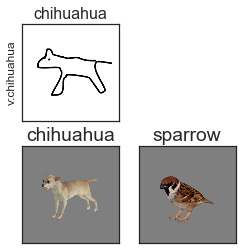

In [422]:
## print out sketches with target & distractors from this game
run_this = 0
    if run_this:
    all_games = click_files
    TrialNum = []
    GameID = []
    Condition = []
    Target = []
    Distractors = []
    Outcome = []
    Response = []

    for a in all_games:
        # load in single subject clickedObj file
        X = tb.tabarray(SVfile=os.path.join(clickedObj_dir,a))
        # print out sketches from all trials from this game
        for t in X: 
            imgData = t['png']
            filestr = base64.b64decode(imgData)
            fname = 'sketch.png'
            with open(fname, "wb") as fh:
                fh.write(imgData.decode('base64'))
            textsize = 16

            # first plot the target
            im = Image.open(fname)
            fig = plt.figure(figsize=(8,4))
            p = plt.subplot(2,4,1)
            plt.imshow(im)
            sns.set_style('white')
            k = p.get_xaxis().set_ticklabels([])
            k = p.get_yaxis().set_ticklabels([])
            k = p.get_xaxis().set_ticks([])
            k = p.get_yaxis().set_ticks([])
            targetname = t['intendedTarget']
            distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
            full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
            outcome = t['outcome']
            response = t['clickedObject']
            plt.title(targetname,fontsize=textsize)
            plt.ylabel('v:' + response,fontsize=textsize-4)

            # fig = plt.figure(figsize=(8,3))
            for (i,d) in enumerate(full_list):
                URL = full_dict[d]
                file = cStringIO.StringIO(urllib.urlopen(URL).read())
                img = Image.open(file)
                p = plt.subplot(2,4,i+5)
                plt.imshow(img)
                p.get_xaxis().set_ticklabels([])
                p.get_yaxis().set_ticklabels([])
                p.get_xaxis().set_ticks([])
                p.get_yaxis().set_ticks([])
                p.set_aspect('equal')   
                plt.title(d)

            sketch_dir = os.path.join(analysis_dir,'sketches')
            filepath = os.path.join(sketch_dir,'gameID_' + t['gameid'] + '_trial_' + str(t['trialNum']))
            helpers.save(filepath, ext='png', close=True, verbose=False)

### Analyze stroke data

In [423]:
##### analysis next steps:
## stroke number, drawing duration, accuracy
Y = tb.tabarray(SVfile=os.path.join(stroke_dir,stroke_files[0]))

# get column names
print Y.metadata['names']

Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
['gameid', 'time', 'trialNum', 'strokeNum', 'targetName', 'svg']


In [424]:
Y[2]['svg']

'M73.77774,108.04166c0,18.81566 49.74439,45.74439 60,56c2.79646,2.79646 64.98946,13 72,13c1.30309,0 52.10383,0.89617 53,0c0.95333,-0.95333 0,-8.54536 0,-10c0,-2.54743 1.65835,-15.34165 0,-17c-6.75948,-6.75948 -75.35804,9.47599 -91,6c-19.30828,-4.29073 -40.10764,-7 -60,-7'

In [425]:
len(Y[Y['trialNum']==2]['svg'])

4

In [426]:
svgs = Y[Y['trialNum']==3]['svg']
ls = [len(s) for s in svgs]
leng = reduce(lambda x, y: x + y, ls)
# sl = 0
# for s in ns:
#     print len(s)
np.std(ls)

165.55139777761602

In [427]:
## analyze data and form game metadata array
all_games = click_files

TrialNum = []
GameID = []
Condition = []
Target = []
Distractor1 = []
Distractor2 = []
Distractor3 = []
Outcome = []
Response = []
numStrokes = []
svgStringLength = [] # sum of svg string for whole sketch
svgStringStd = [] # std of svg string length across strokes for this sketch

for a in all_games:
    # load in single subject clickedObj file
    X = tb.tabarray(SVfile=os.path.join(clickedObj_dir,a))
    Y = tb.tabarray(SVfile=os.path.join(stroke_dir,a))
    # print out sketches from all trials from this game
    for t in X: 
        targetname = t['intendedTarget']
        distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
        full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
        ns = sum(Y['trialNum']==t['trialNum'])
        numStrokes.append(ns)
        svgs = Y[Y['trialNum']==t['trialNum']]['svg']
        ls = [len(s) for s in svgs]
        svgStringLength.append(reduce(lambda x, y: x + y, ls))  
        svgStringStd.append(np.std(ls))
        ## aggregate game metadata
        TrialNum.append(t['trialNum'])
        GameID.append(t['gameid'])        
        Target.append(targetname)
        Distractor1.append(distractors[0])
        Distractor2.append(distractors[1])
        Distractor3.append(distractors[2])        
        if get_basic_names(targetname)==get_basic_names(distractors[0]): # 'closer' condition
            Condition.append('closer')
        else:
            Condition.append('further') 
        Outcome.append(t['outcome'])
        Response.append(t['clickedObject'])    

GameID,TrialNum,Condition, Target, Distractor1, Distractor2, Distractor3, Outcome, Response, numStrokes, svgStringLength,svgStringStd = map(np.array, \
[GameID,TrialNum,Condition, Target, Distractor1, Distractor2, Distractor3, Outcome, Response, numStrokes, svgStringLength,svgStringStd])

D = tb.tabarray(names = ['gameID','trialNum','condition', 'target', 'd1', 'd2','d3', 'outcome', 'response','numStrokes', 'svgStringLength','svgStringStd'],
                columns = [GameID,TrialNum,Condition, Target, Distractor1, Distractor2, Distractor3, Outcome, Response, numStrokes, svgStringLength,svgStringStd])

Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Inferring 

In [428]:
# get summary statistics
all_games = np.unique(D['gameID'])
further_strokes = []
closer_strokes = []
further_svgLength = []
closer_svgLength = []
for game in all_games:    
    further_strokes.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['numStrokes'].mean())
    closer_strokes.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['numStrokes'].mean())
    further_svgLength.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['svgStringLength'].mean())
    closer_svgLength.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['svgStringLength'].mean())
    
further_strokes, closer_strokes, further_svgLength, closer_svgLength = map(np.array, \
[further_strokes, closer_strokes, further_svgLength, closer_svgLength])

In [429]:
print further_strokes.mean()
print closer_strokes.mean()
print further_svgLength.mean()
print closer_svgLength.mean()

6.265625
9.346875
996.496875
1592.13125


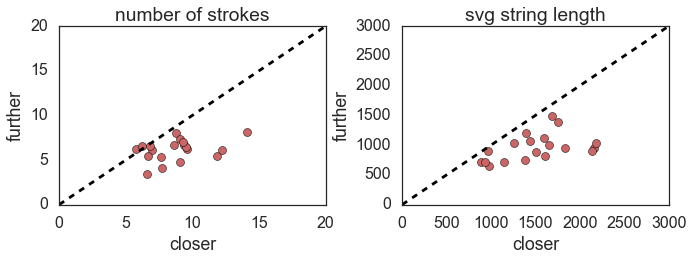

In [431]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
lb = 0
ub = 20
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_strokes,further_strokes,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.title('number of strokes')
plt.xlabel('closer')
plt.ylabel('further')
plt.subplot(1,2,2)
lb = 0
ub = 3000
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_svgLength,further_svgLength,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.tight_layout()
plt.title('svg string length')
plt.xlabel('closer')
plt.ylabel('further')

In [436]:
import numpy.random as npr
import pylab
def bootstrap(data, num_samples, statistic, alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])


5.709375 6.81875
8.06875 10.875


In [461]:
numStrokes = pd.DataFrame(np.vstack((closer_strokes,further_strokes)).transpose(), \
                 columns = ['closer','further'])
svgLength = pd.DataFrame(np.vstack((closer_svgLength,further_svgLength)).transpose(), \
                 columns = ['closer','further'])


Saving figure to 'plots/strokes_by_condition.pdf'... Done


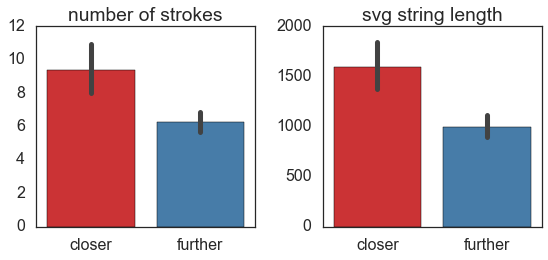

In [473]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(data=numStrokes,ci=95,palette="Set1")
plt.title('number of strokes')
plt.subplot(1,2,2)
sns.barplot(data=svgLength,ci=95,palette="Set1")
plt.tight_layout()
plt.title('svg string length')

save_out = 1
if save_out:
    helpers.save('plots/strokes_by_condition', ext='pdf', close=False, verbose=True)

## 3D Object Gallery

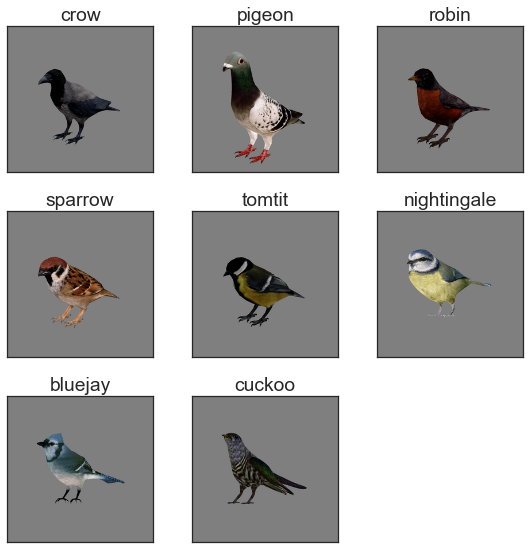

In [118]:
plot_gallery(canonical_birds)

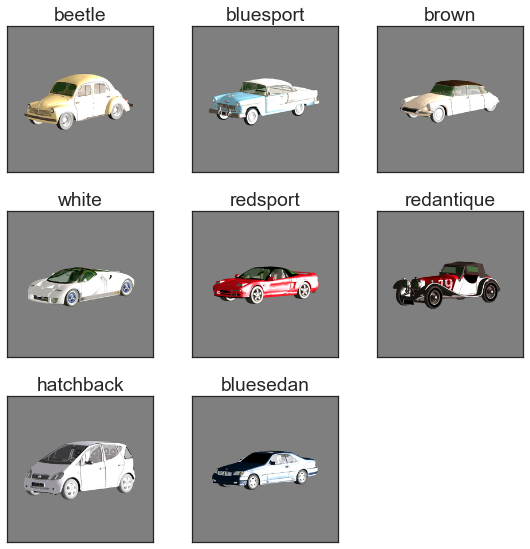

In [119]:
plot_gallery(canonical_cars)

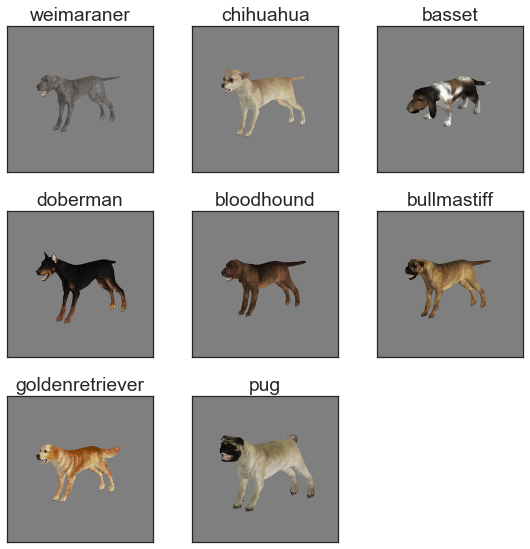

In [120]:
plot_gallery(canonical_dogs)

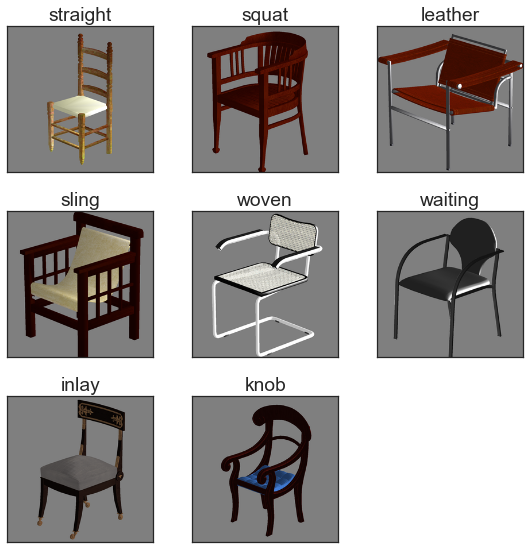

In [121]:
plot_gallery(canonical_chairs)